In [11]:
# !pip install langgraph

In [12]:
from typing import TypedDict,List
from langgraph.graph import StateGraph

In [13]:
class AgentState(TypedDict):
    values:List[int]
    name:str
    operation:str


In [14]:
import math

def operation(state : AgentState) -> AgentState:
    """This function is to perfrom operations"""
    if state['operation'] == '+':
        state['operation'] = f"Hi {state['name']}! Your sum = {sum(state['values'])}"
    if state['operation'] == '*':
        state['operation'] = f"Hi {state['name']}! Your product = {math.prod(state['values'])}"
    return state

In [15]:
graph = StateGraph(AgentState)

graph.add_node("operation",operation)
graph.set_entry_point("operation")
graph.set_finish_point("operation")

app = graph.compile()

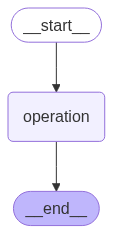

In [16]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
result = app.invoke({"name":"ashok","values":[1,2,3,4,5,6],"operation":"+"})

In [20]:
result

{'values': [1, 2, 3, 4, 5, 6],
 'name': 'ashok',
 'operation': 'Hi ashok! Your sum = 21'}